<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-02_Machine_Learning/231227_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI 프로그래밍 - KNN
##머신러닝 데이터 전처리
###레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder
items = ["tv",
"냉장고", "컴퓨터", "전자레인지", "믹서", "선풍기", "믹서"]
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('labels:', labels)
print('encoder.classes:', encoder.classes_)
print('encoder.inverse_transform :',encoder.inverse_transform([4, 5, 3, 2, 4, 2, 0, 1, 1]))

labels: [0 1 5 4 2 3 2]
encoder.classes: ['tv' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
encoder.inverse_transform : ['전자레인지' '컴퓨터' '선풍기' '믹서' '전자레인지' '믹서' 'tv' '냉장고' '냉장고']


원핫 인코딩

In [ ]:
import pandas as pd
df=pd.DataFrame({'items':items})
print(df)
print(pd.get_dummies(df))

   items
0     tv
1    냉장고
2    컴퓨터
3  전자레인지
4     믹서
5    선풍기
6     믹서
   items_tv  items_냉장고  items_믹서  items_선풍기  items_전자레인지  items_컴퓨터
0         1          0         0          0            0          0
1         0          1         0          0            0          0
2         0          0         0          0            0          1
3         0          0         0          0            1          0
4         0          0         1          0            0          0
5         0          0         0          1            0          0
6         0          0         1          0            0          0


### 데이터 스케일링
데이터 값의 범위가 달라 범위 차이가 크면 모델링을 했을 때 0으로 수렴하거나 무한으로 발산하기 때문에 데이터 분포나 범위를 정규화 한다.\
breast_cancer()\
StandardScaler()\
MinMaxScaler()\
MaxAbsScaler()\
RobustScaler()\
Normalizer()

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()     #유방암 데이터셋 불러오기

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 자료 분배하기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))

모델의 정확도 : 0.9035


In [ ]:
# StandardScaler : 평균이 0이고 분산이 1인 정규 분포로 만드는 것, 표준편차란 평균으로부터 얼마나 떨어져있는지를 구한 것

from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
std = StandardScaler()

# 교차검증시
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.8947


In [ ]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

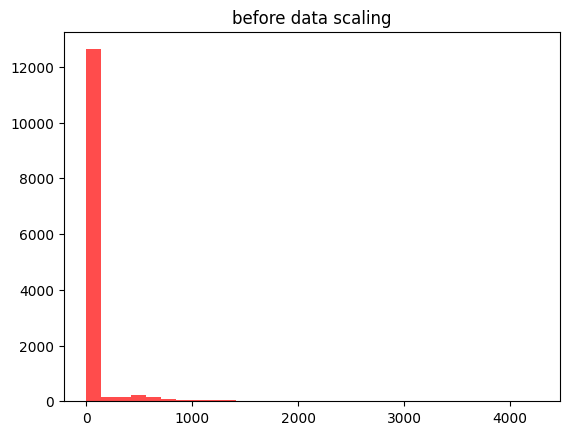

In [ ]:
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

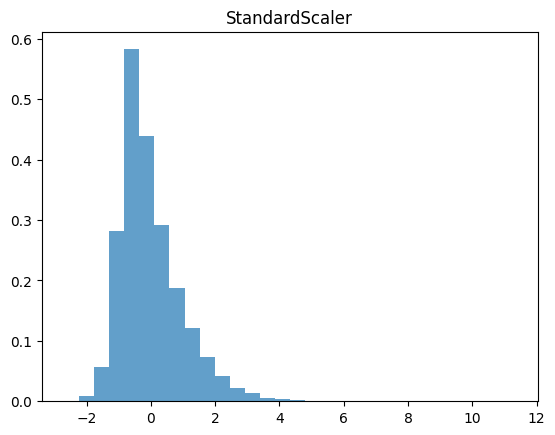

In [ ]:
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

In [ ]:
#MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

#normalization 최소값 0 / 최대값 1
mms = MinMaxScaler()

#교차검증시
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9035


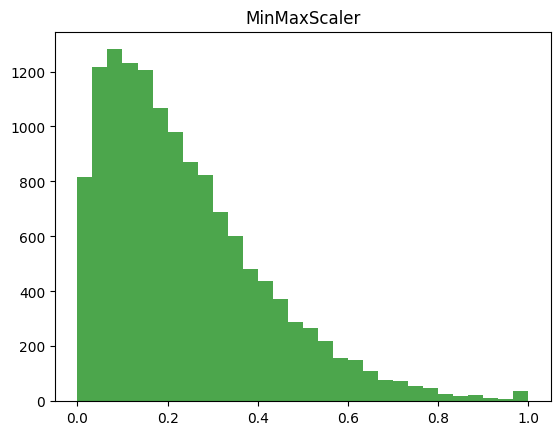

In [ ]:
#스케일링 후의 데이터 값들이 0과 1사이에 분포
X_train_scaled_mms = X_train_scaled.reshape(13650,1)
plt.hist(X_train_scaled_mms, bins=30, color='green', alpha = 0.7)
plt.title('MinMaxScaler')
plt.show()

In [ ]:
# MaxAbsScaler() : 최대값은 1 최소값은 0으로 최소-최대 정규화 Min-Max Normalization 이상치에 취약
from sklearn.preprocessing import MaxAbsScaler

#절대값
scaler = MaxAbsScaler()

#교차검증시
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.8947


In [ ]:
# RobustScaler(): 중앙값은 0 / IQR(1분위(25%) ~ 3분위(75%)) = 1, 이상치(outlier) 영향 최소화하고 더 넓게 분포 됨

from sklearn.preprocessing import RobustScaler

#중앙값0/IQR 1
rbs = RobustScaler()

#교차검증시
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9035


### 코드 설명
모듈 불러오고 유방암 데이터셋 불러오기

In [ ]:
from sklearn import svm, datasets
cancer = datasets.load_breast_cancer()  #데이터 로드
cancer.keys()       #데이터셋 키 보기

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

데이터셋 확인

In [ ]:
import pandas as pd
# pandas 데이터프레임 변환
dfX = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfy = pd.DataFrame(cancer.target, columns=['target'])
print('features ;', dfX.shape)
print('lable : ', dfy.shape)

features ; (569, 30)
lable :  (569, 1)


In [ ]:
dfX.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dfy.head()  #cancer 인가 아닌가를 y값으로 설정한 것을 확인

,target
0,0
1,0
2,0
3,0
4,0


통계청 데이터엔 코드북이 거의 존재함

In [ ]:
dfX.info()      #데이터셋의 인포 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#결측값 확인
df.isnull()

,items
0,False
1,False
2,False
3,False
4,False
5,False
6,False


In [ ]:
#데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455, 1) (114, 1)


In [ ]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3, :]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

In [ ]:
X_test = sc.transform(X_test)
y_test = y_test.values

In [ ]:
y_train = y_train.flatten()

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')      # 모델 만들어서
svc.fit(X_train, y_train)       # 모델 피팅

SVC(kernel='linear')

In [ ]:
y_test = y_test.flatten()
y_pred = svc.predict(X_test)        # 테스트 데이터로 예측
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

### Confusion Matrix
- 정확도 (accurcy)\
‣ from sklearn.metrics import accuracy_score
‣ accuracy_score(정답, 예측)
- 정밀도 (precision)\
‣ from sklearn.metrics import precision_score
‣ precision_score(정답, 예측)
- 재현율 (recall)\
‣ from sklearn.metrics import recall_score
‣ recall_score(정답, 예측)
- F1 스코어\
‣ from sklearn.metrics import f1_score
‣ f1_score(정답, 예측)
- ROC, AUC\
‣ from sklearn.metrics import roc_auc_score
‣ roc_auc_score(정답, 예측)

In [ ]:
from sklearn.metrics import *

print("정확도 : ", accuracy_score(y_test, y_pred))

정확도 :  0.956140350877193


펭귄 데이터 실습

In [ ]:
p = pd.read_csv('penguins.csv')
p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
p.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [ ]:
p_1 = p.dropna()
p_1.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
338,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [ ]:
p_1.keys

<bound method NDFrame.keys of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1  

In [ ]:
import pandas as pd
# pandas 데이터프레임 변환
dfX = pd.DataFrame(p_1)
dfy = pd.DataFrame(p_1.species, columns=['species'])
print('features ;', dfX.shape)
print('lable : ', dfy.shape)

features ; (333, 7)
lable :  (333, 1)


In [ ]:
dfX.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


펭귄데이터 성별타겟

In [ ]:
df = pd.read_csv('penguins.csv')
# Filling missing values with the median of each column
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].median())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].median())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].median())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].median())

# Filling missing values in 'sex' column with the mode
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

# Checking if the missing values
df.isnull().sum()

X = df.drop('sex',axis=1)
y = df['sex']

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2,
                                                    stratify =y, random_state=24)


X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


X_test.reset_index()
y_train.columns = ['target']
y_test.columns = ['target']

X_train  = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

from sklearn.model_selection import train_test_split
X_train, X_val , y_train, y_val  = train_test_split(X_train,y_train['target'],test_size=0.2,
                                                    random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_val)

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
acc = accuracy_score(y_val, y_pred)
print(acc)

(220, 10)
(55, 10)
(220,)
(55,)
0.8909090909090909


In [ ]:
p = pd.read_csv('penguins.csv')
p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
X = p.drop('bill_depth_mm',axis=1)
y = p['bill_depth_mm']

In [ ]:
#데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(275, 6) (69, 6)
(275,) (69,)


In [ ]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3, :]

In [ ]:
X_test = sc.transform(X_test)
y_test = y_test.values

In [ ]:
y_train = y_train.flatten()

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')      # 모델 만들어서
svc.fit(X_train, y_train)       # 모델 피팅

In [ ]:
y_test = y_test.flatten()
y_pred = svc.predict(X_test)        # 테스트 데이터로 예측
y_pred

In [ ]:
from sklearn.metrics import *

print("정확도 : ", accuracy_score(y_test, y_pred))

펭귄데이터 종 타겟

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
df = pd.read_csv('penguins.csv')

# Fill missing values for numerical columns with their medians
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
                     'body_mass_g']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values in 'sex' column with the mode
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

# 종을 타겟 y값으로 데이터 분할
X = df.drop('species', axis=1)
y = df['species']

# 원 핫 인코딩
X = pd.get_dummies(X)

# 훈련/검증자료 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=24)

# Further split the training set for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy}')

Validation Accuracy: 0.9879518072289156


펭귄데이터 종 혼동행렬

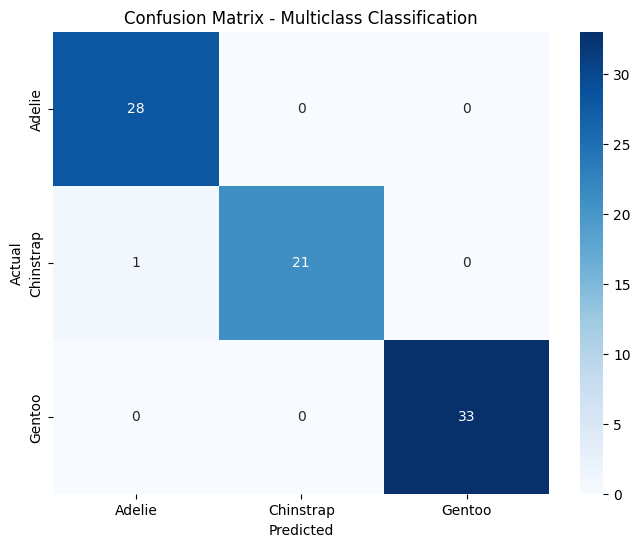

In [ ]:
# 혼동 행렬을 계산합니다
cm = confusion_matrix(y_val, y_pred)

# 혼동 행렬을 데이터프레임으로 변환합니다
classes = np.unique(y)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Seaborn을 사용하여 히트맵으로 혼동 행렬을 그립니다
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Confusion Matrix - Multiclass Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN-피마인디언 당뇨병 데이터

Pregnancies: 임신 횟수\
Glucose: 포도당 부하 검사 수치\
BloodPressure: 혈압(mm Hg)\
SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
Insulin: 혈청 인슐린(mu U/ml)\
BMI: 체질량지수(체중(kg)/키(m))^2\
DiabetesPedigreeFunction: 당뇨 내력 가중치 값\
Age: 나이\
Outcome: 클래스 결정 값(0 또는 1)

In [ ]:
dia = pd.read_csv('diabetes.csv')
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
